## Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import one_hot
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

## Data

In [2]:
os.chdir('/Users/biancaorozco/Desktop/Metis/project5/math/data')
df_train = pd.read_csv('df_train2.csv')

### Split Train/Validate Data

In [3]:
Xtrain, Xval, ytrain, yval = train_test_split(df_train.drop('target', axis=1), df_train['target'], test_size=0.2, random_state = 33)

### Final Training Data

In [4]:
Xtrain_final = df_train.drop('target', axis=1)
ytrain_final = df_train['target']
ytrain_final.unique()

array(['o', '1', '+', 'u', 'm', '4', '(', '-', '9', 'y', 'f', '6', 'x',
       ')', '7', '8', '0', 'i', '3', 'k', 't', 'z', 'j', ']', 'h', '=',
       'p', 'v', 'w', 'a', 'c', '[', 'l', 'n', '5', '2', 'e', 'g', 'd',
       'q', 's', 'b', 'r'], dtype=object)

## Modeling

### Train/Validate Modeling

In [5]:
rf = RandomForestClassifier(n_estimators=500,max_depth = 9)
rf.fit(Xtrain, ytrain)
ypred_val = rf.predict(Xval)
print('Random Forest Accuracy Score: ', accuracy_score(yval, ypred_val))

Random Forest Accuracy Score:  0.7542


In [6]:
# Checking for Overfitting
ypred_train = rf.predict(Xtrain)
print('Predicting on Training Data\nChecking for Overfitting: ', accuracy_score(ytrain, ypred_train))

Predicting on Training Data
Checking for Overfitting:  0.804075


### Final Train Modeling

In [7]:
rf = RandomForestClassifier(n_estimators=500,max_depth = 9)
rf.fit(Xtrain_final, ytrain_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Prediction Base Case

In [8]:
print("Printing all 0's and all 1's respectively:")
print(rf.predict([
    [0] * 2500, 
    [1] * 2500
]))

Printing all 0's and all 1's respectively:
['m' '=']


## Image Testing

### Symbol Check

In [9]:
df = df_train.loc[lambda df_train: df_train['target'] == '1']
df = df.reset_index(drop=True).drop('target', axis=1)

['1']


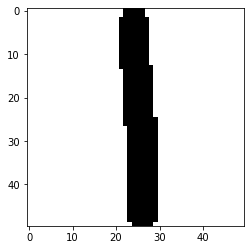

In [10]:
ex = np.array(df.iloc[2])
matx = ex.reshape(50, 50)
print(rf.predict([ex]))
plt.imshow(matx, cmap='gray')

### My Writing

In [11]:
from skimage import io
from skimage.transform import rescale
os.chdir('/Users/biancaorozco/Desktop/Metis/project5/math/images')
img = io.imread("image2.jpg")

<br/> 
**Original Image**

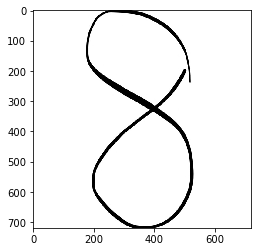

In [12]:
plt.imshow(img);

<br/>  
**Rescaled Image**

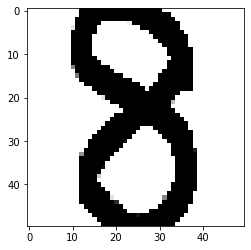

In [13]:
img1 = img[:, :, 0] > 200
img2 = rescale(img1, ((1 / (img1.shape[0] / 50))), anti_aliasing=True)
plt.imshow(img2, cmap='gray')

**Prediction**

In [14]:
img3 = img2.flatten()
rf.predict([img3])

array(['8'], dtype=object)

**Success!!!**

**Notes:  
The symbol needs to be thick and touch the image from top to bottom.  
Image needs to be square.**

## Equation Testing

### y=mx

(419, 1916, 3)


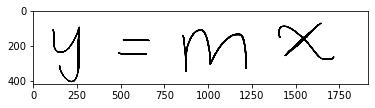

In [15]:
equ = io.imread("image3.jpg")
print(equ.shape)
plt.imshow(equ);

### Sliding Window

In [16]:
def sliding_window(image):
    slices = []
    for i in range(image.shape[1]//image.shape[0]):
        
        dim = image.shape[0]
        if i > 0:
            start = dim + dim*(i-1)
        else:
            start = 0
        
        stop = start + dim
        
        if stop > image.shape[1]:
            stop = image.shape[1]
        
        slices.append(image[:, start:stop])
        
    return slices

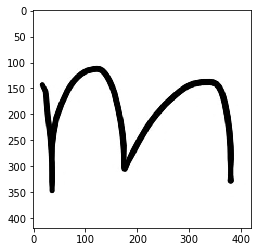

In [17]:
slices = sliding_window(equ)
plt.imshow(slices[2])

### Reshape Equation

In [18]:
def equ_reshape(images_list):
    reshaped = []
    for i in range(len(images_list)):
        image = images_list[i]
        img1 = image[:, :, 0] > 200
        img2 = rescale(img1, ((1 / (img1.shape[0] / 50))), anti_aliasing=True)
        reshaped.append(img2)
    return reshaped

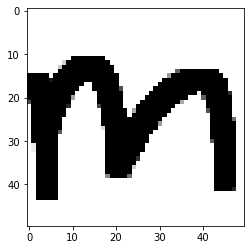

In [19]:
reshaped_list = equ_reshape(slices)
plt.imshow(reshaped_list[2], cmap = 'gray');

### Predict y=mx

In [20]:
from IPython.display import HTML as html_print


def cstr(s, color='black', size='100'):
    return "<text style=color:{};font-size:{}%>{}</text>".format(
        color, size, s)


def pred_equ(image):
    image_list = equ_reshape(sliding_window(image))
    predictions = []
    for i in range(len(image_list)):
        matx = image_list[i]
        arr = matx.flatten()
        predictions.append(rf.predict([arr])[0])
    s = ''
    return html_print(cstr(s.join(predictions), color='green', size='150'))

In [21]:
pred = pred_equ(equ)
pred

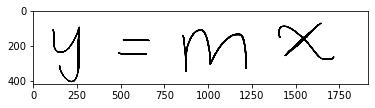

In [22]:
plt.imshow(equ);

**Success!!!**

### y=mx+b

(200, 1238, 4)


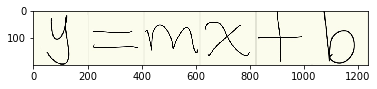

In [23]:
equ1 = io.imread("equation1.png")
print(equ1.shape)
plt.imshow(equ1);

In [24]:
pred_equ(equ1)

**It didn't understand b**  
<br/>

(200, 1238, 4)


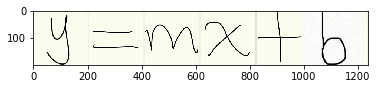

In [25]:
equ2 = io.imread("equation2.png")
print(equ2.shape)
plt.imshow(equ2);

In [26]:
pred_equ(equ2)

**It predicted 6 symbols!!!**  
<br/>

### 24x+6

(200, 1030, 4)


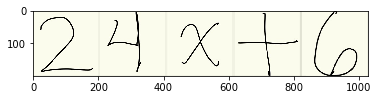

In [27]:
equ4 = io.imread("equation4.png")
print(equ4.shape)
plt.imshow(equ4);

In [28]:
pred_equ(equ4)

**It's not predicting 6**  
<br/>

### 3n-8

(204, 820, 4)


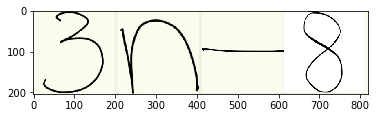

In [29]:
equ5 = io.imread("equation5.png")
print(equ5.shape)
plt.imshow(equ5);

In [30]:
pred_equ(equ5)

**IT WORKED!!!!!**  
<br/>

### 25x+1

(200, 1028, 4)


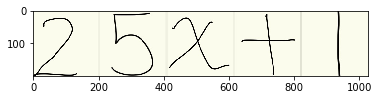

In [31]:
equ6 = io.imread("equation6.png")
print(equ6.shape)
plt.imshow(equ6);

In [32]:
pred_equ(equ6)

**YASSSSSS!!!**  
<br/>  
<br/>  
<br/> 

## Demo

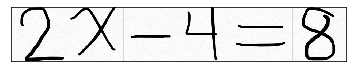

In [33]:
demo = io.imread("demo.png")
demo_p = plt.imshow(demo)
demo_p.axes.get_xaxis().set_visible(False)
demo_p.axes.get_yaxis().set_visible(False);

In [34]:
pred_equ(demo)

$$\overline{X}={\frac {1}{n}}{\displaystyle\sum _{i=1}^{n}x_{i}}$$

$$\overline{X}={\frac {1}{n}}{\displaystyle\sum _{i=1}^{n}x_{i}}$$

$$\overline{X}={\frac {1}{n}}{\displaystyle\sum _{i=1}^{n}x_{i}}$$